In [1]:
from src.artificialmap.model import Model, ModelController
from src.artificialmap.elements import EnvironmentElement

### Model and Model Controller

To create a object we need to use some functions which will be our model.


In [2]:
def hill(i, j):
    return -0.4*(i**2 + j**2) + 10


def hole(i, j):
    return i + j - 10

The first example will be a `hole` which will show how `under_ground` works.



In [3]:
hole_one = Model(model=hole, central_position=(5, 5), under_ground=False)
hole_two = Model(model=hole, central_position=(5, 5), under_ground=True)


I am using `EnvironmentElement` to show the result.

`generate` returns a matrix of the given model

`resolve` return the value from a specific point

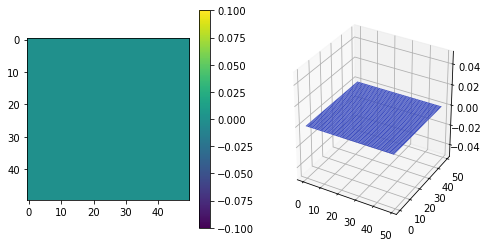

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
0
[[-20. -19. -18.]
 [-19. -18. -17.]
 [-18. -17. -16.]]
-20


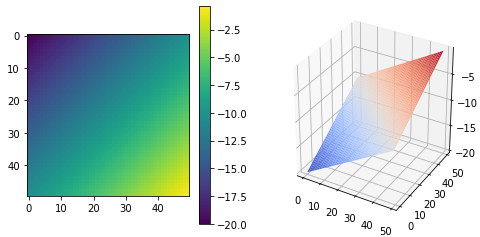

In [4]:
hole_one_element = EnvironmentElement(size=(10, 10), resolution=5, model=hole_one)
hole_one_element.generate_element_from_model().show()
print(hole_one.generate((3, 3), 1))
print(hole_one.resolve(0,0))

hole_two_element = EnvironmentElement(size=(10, 10), resolution=5, model=hole_two)
hole_two_element.generate_element_from_model().show()
print(hole_two.generate((3, 3), 1))
print(hole_two.resolve(0,0))

The second example is a `hill` and the argument which is changed is `central_position`.

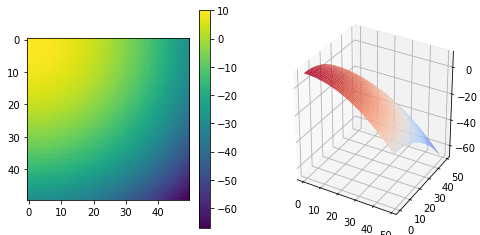

[[10.   9.6  8.4]
 [ 9.6  9.2  8. ]
 [ 8.4  8.   6.8]]
10.0
[[-10.   -6.4  -3.6]
 [ -6.4  -2.8   0. ]
 [ -3.6   0.    2.8]]
-10.0


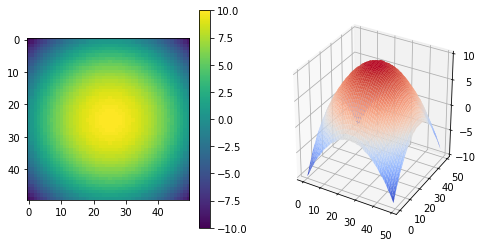

In [5]:
hill_one = Model(model=hill, central_position=(0, 0), under_ground=True)
hill_two = Model(model=hill, central_position=(5, 5), under_ground=True)

hill_one_element = EnvironmentElement(size=(10, 10), resolution=5, model=hill_one)
hill_one_element.generate_element_from_model().show()
print(hill_one.generate((3, 3), 1))
print(hill_one.resolve(0,0))
hill_two_element = EnvironmentElement(size=(10, 10), resolution=5, model=hill_two)
hill_two_element.generate_element_from_model().show()
print(hill_two.generate((3, 3), 1))
print(hill_two.resolve(0,0))

## `ModelController`
This method can store more than one `Model`. Contains also `generate` and `resolve` functions.



There are two options(`replace` - use `additional_models`, `bigger_values_only` - takes the highest value for every point from every `Model` stored in `ModelController`), each treats models in a different way.

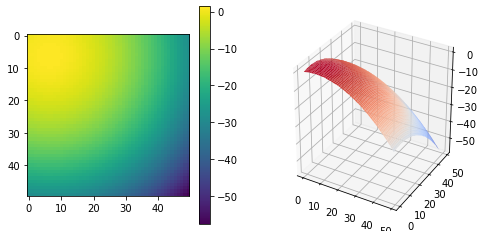

[[0.  0.6 0.4]
 [0.6 1.2 1. ]
 [0.4 1.  0.8]]
0.0


In [6]:
model_one = ModelController(main_model=Model(model=hill, central_position=(0, 0), under_ground=True), additional_models=[Model(model=hole, central_position=(0, 0), under_ground=True)], replace=False, bigger_values_only=False)

model_one_element = EnvironmentElement(size=(10, 10), resolution=5, model=model_one)
model_one_element.generate_element_from_model().show()
print(model_one.generate((3, 3), 1))
print(model_one.resolve(0,0))

In [7]:
model_two = ModelController(main_model=Model(model=hill, central_position=(0, 0), under_ground=True), additional_models=[Model(model=hole, central_position=(0, 0), under_ground=True)], replace=True, bigger_values_only=False)

model_two_element = EnvironmentElement(size=(10, 10), resolution=5, model=model_two)
model_two_element.generate_element_from_model().show()
print(model_two.generate((3, 3), 1))
print(model_two.resolve(0,0))

[[-10.  -9.  -8.]
 [ -9.  -8.  -7.]
 [ -8.  -7.  -6.]]
-10


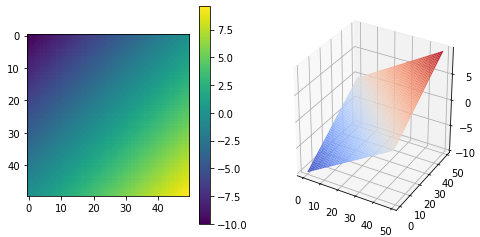

[[-10.  -9.  -8.]
 [ -9.  -8.  -7.]
 [ -8.  -7.  -6.]]
-10


In [8]:
model_three = ModelController(main_model=Model(model=hill, central_position=(0, 0), under_ground=True), additional_models=[Model(model=hole, central_position=(0, 0), under_ground=True)], replace=True, bigger_values_only=True)

model_three_element = EnvironmentElement(size=(10, 10), resolution=5, model=model_three)
model_three_element.generate_element_from_model().show()
print(model_three.generate((3, 3), 1))
print(model_three.resolve(0, 0))

In [9]:
model_four = ModelController(main_model=Model(model=hill, central_position=(0, 0), under_ground=True), additional_models=[Model(model=hole, central_position=(0, 0), under_ground=True)], replace=False, bigger_values_only=True)

model_four_element = EnvironmentElement(size=(10, 10), resolution=5, model=model_four)
model_four_element.generate_element_from_model().show()
print(model_four.generate((3, 3), 1))
print(model_four.resolve(0, 0))

[[10.   9.6  8.4]
 [ 9.6  9.2  8. ]
 [ 8.4  8.   6.8]]
10.0
